In [43]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [44]:
# Paths (edit if needed)
PROJECT_ROOT = Path.cwd().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
RAW_ROOT = PROJECT_ROOT / "data" / "raw" / "bearing-dataset"   # change if needed
PROCESSED_DIR = PROJECT_ROOT / "data" / "processed"
FIG_DIR = PROJECT_ROOT / "reports" / "figures"
DOCS_DIR = PROJECT_ROOT / "docs"

PROCESSED_DIR.mkdir(parents=True, exist_ok=True)
FIG_DIR.mkdir(parents=True, exist_ok=True)
DOCS_DIR.mkdir(parents=True, exist_ok=True)

print("Project root:", PROJECT_ROOT)
print("Raw data root:", RAW_ROOT)

Project root: c:\Users\Meghana C Reddy\Desktop\ts_work\ts-anomaly-iot
Raw data root: c:\Users\Meghana C Reddy\Desktop\ts_work\ts-anomaly-iot\data\raw\bearing-dataset


In [45]:
from pathlib import Path
import pandas as pd

#Path to your dataset folder
RAW_ROOT = Path(r"C:\Users\Meghana C Reddy\Desktop\ts_work\ts-anomaly-iot\data\raw\bearing_dataset\1st_test\1st_test")

def read_bearing_file(filepath):
    """
    Reads numeric time-series data from a file.
    Returns pandas.Series or DataFrame depending on number of columns.
    """
    try:
        df = pd.read_csv(filepath, header=None, delim_whitespace=True)
    except Exception:
        df = pd.read_csv(filepath, header=None)
    
    if df.shape[1] == 1:
        return df.iloc[:, 0].rename(Path(filepath).stem)
    else:
        df.columns = [f"ch_{i}" for i in range(df.shape[1])]
        return df

def find_dataset_files(root: Path):
    """
    Recursively find all files (any extension) in a folder.
    """
    files = []
    for p in root.rglob("*"):
        if p.is_file():
            files.append(p)
    return sorted(files)

#Check all files
files = find_dataset_files(RAW_ROOT)
print(f"Found {len(files)} data files.")
print("First few files:")
for f in files[:10]:
    print(f)

Found 2156 data files.
First few files:
C:\Users\Meghana C Reddy\Desktop\ts_work\ts-anomaly-iot\data\raw\bearing_dataset\1st_test\1st_test\2003.10.22.12.06.24
C:\Users\Meghana C Reddy\Desktop\ts_work\ts-anomaly-iot\data\raw\bearing_dataset\1st_test\1st_test\2003.10.22.12.09.13
C:\Users\Meghana C Reddy\Desktop\ts_work\ts-anomaly-iot\data\raw\bearing_dataset\1st_test\1st_test\2003.10.22.12.14.13
C:\Users\Meghana C Reddy\Desktop\ts_work\ts-anomaly-iot\data\raw\bearing_dataset\1st_test\1st_test\2003.10.22.12.19.13
C:\Users\Meghana C Reddy\Desktop\ts_work\ts-anomaly-iot\data\raw\bearing_dataset\1st_test\1st_test\2003.10.22.12.24.13
C:\Users\Meghana C Reddy\Desktop\ts_work\ts-anomaly-iot\data\raw\bearing_dataset\1st_test\1st_test\2003.10.22.12.29.13
C:\Users\Meghana C Reddy\Desktop\ts_work\ts-anomaly-iot\data\raw\bearing_dataset\1st_test\1st_test\2003.10.22.12.34.13
C:\Users\Meghana C Reddy\Desktop\ts_work\ts-anomaly-iot\data\raw\bearing_dataset\1st_test\1st_test\2003.10.22.12.39.13
C:\Users

In [46]:
sample_file = files[0]
print("Sample file path:", sample_file)

# Try to open and preview first 10 lines
with open(sample_file, 'r') as f:
    for i in range(10):
        print(f.readline().strip())


Sample file path: C:\Users\Meghana C Reddy\Desktop\ts_work\ts-anomaly-iot\data\raw\bearing_dataset\1st_test\1st_test\2003.10.22.12.06.24
-0.022	-0.039	-0.183	-0.054	-0.105	-0.134	-0.129	-0.142
-0.105	-0.017	-0.164	-0.183	-0.049	0.029	-0.115	-0.122
-0.183	-0.098	-0.195	-0.125	-0.005	-0.007	-0.171	-0.071
-0.178	-0.161	-0.159	-0.178	-0.100	-0.115	-0.112	-0.078
-0.208	-0.129	-0.261	-0.098	-0.151	-0.205	-0.063	-0.066
-0.232	-0.061	-0.281	-0.125	0.046	-0.088	-0.078	-0.078
-0.112	-0.132	-0.181	-0.186	-0.132	-0.051	-0.132	-0.076
-0.054	-0.107	-0.173	-0.134	-0.164	0.002	-0.146	-0.125
-0.159	-0.032	-0.161	-0.181	-0.110	-0.044	-0.173	-0.137
-0.225	-0.044	-0.090	-0.159	-0.100	-0.151	-0.139	-0.076


In [47]:
import pandas as pd
from pathlib import Path

# Point directly to folder containing numeric files
ROOT = Path(r"C:\Users\Meghana C Reddy\Desktop\ts_work\ts-anomaly-iot\data\raw\bearing_dataset\1st_test\1st_test")

files = sorted(ROOT.rglob("*"))
print(f"Total files found: {len(files)}")

def read_bearing_file(file_path):
    try:
        df = pd.read_csv(file_path, sep=r"\s+", header=None, engine='python')
        df.columns = [f"ch_{i+1}" for i in range(df.shape[1])]
        return df
    except Exception as e:
        print(f"Skipping {file_path.name} — {e}")
        return None

# Read only first few files for testing
sample_files = [f for f in files if f.is_file()][0:10]
print(f"Reading {len(sample_files)} files...")

data = []
for f in sample_files:
    d = read_bearing_file(f)
    if d is not None:
        data.append(d)

print(f"Loaded {len(data)} valid files.")

Total files found: 2156
Reading 10 files...
Loaded 10 valid files.


Combined sample shape: (204800, 8)

Basic Statistics:


,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8
count,204800.000000,204800.000000,204800.000000,204800.000000,204800.000000,204800.000000,204800.000000,204800.000000
mean,-0.095449,-0.094963,-0.095391,-0.095305,-0.092955,-0.092936,-0.082086,-0.092503
std,0.080909,0.070996,0.089688,0.076527,0.091979,0.095199,0.064778,0.065444
min,-0.720000,-0.591000,-0.725000,-0.625000,-0.601000,-0.784000,-0.420000,-0.627000
25%,-0.149000,-0.139000,-0.156000,-0.146000,-0.154000,-0.156000,-0.125000,-0.132000
50%,-0.095000,-0.095000,-0.095000,-0.095000,-0.093000,-0.093000,-0.083000,-0.093000
75%,-0.042000,-0.051000,-0.034000,-0.044000,-0.032000,-0.032000,-0.042000,-0.054000
max,0.479000,0.703000,0.359000,0.298000,0.623000,0.466000,0.376000,0.449000


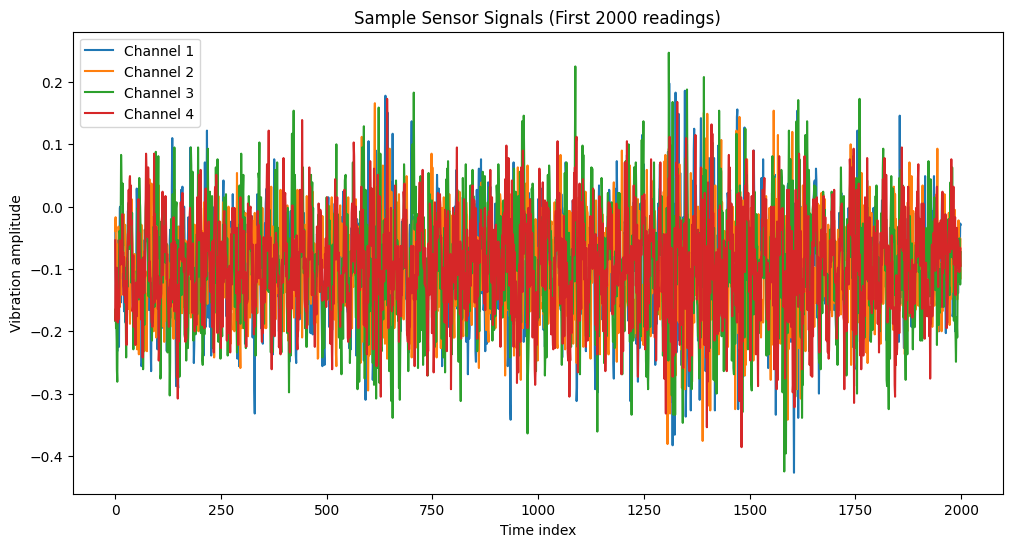


 Missing values per column:
ch_1    0
ch_2    0
ch_3    0
ch_4    0
ch_5    0
ch_6    0
ch_7    0
ch_8    0
dtype: int64

 Columns with constant values:
[]


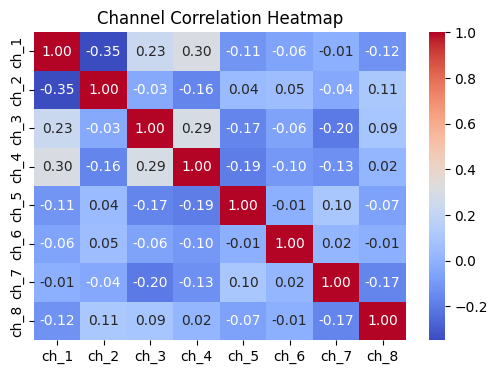

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the 10 sample files into one DataFrame for quick exploration
df_sample = pd.concat(data, axis=0, ignore_index=True)

print("Combined sample shape:", df_sample.shape)
print("\nBasic Statistics:")
display(df_sample.describe())

# Plot a few random channels
plt.figure(figsize=(12, 6))
for i in range(min(4, df_sample.shape[1])):  # plot first 4 channels
    plt.plot(df_sample.iloc[:2000, i], label=f"Channel {i+1}")
plt.title("Sample Sensor Signals (First 2000 readings)")
plt.xlabel("Time index")
plt.ylabel("Vibration amplitude")
plt.legend()
plt.show()

# Check for missing or constant values
print("\n Missing values per column:")
print(df_sample.isna().sum())

print("\n Columns with constant values:")
print([col for col in df_sample.columns if df_sample[col].nunique() == 1])

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_sample.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Channel Correlation Heatmap")
plt.show()

In [49]:
import numpy as np
import pandas as pd
from scipy import stats

# Compute Z-scores — keep as DataFrame (same shape and labels)
z_scores = np.abs(pd.DataFrame(stats.zscore(df_clean), columns=df_clean.columns))

# Create boolean mask for outliers
threshold = 3
outlier_mask = (z_scores > threshold)

# Compute column medians
medians = df_clean.median()

# Copy and replace outliers column-wise
df_no_outliers = df_clean.copy()
for col in df_clean.columns:
    df_no_outliers.loc[outlier_mask[col], col] = medians[col]

print(f"\nOutliers replaced: {outlier_mask.sum().sum()} values")
print("Outlier handling completed successfully!")



Outliers replaced: 9951 values
Outlier handling completed successfully!


In [50]:
import numpy as np
import pandas as pd

# Copy cleaned dataframe
df_features = df_no_outliers.copy()

# Rolling window size
window = 50  

# Rolling mean and standard deviation
df_features_rolling = df_features.rolling(window=window)
rolling_mean = df_features_rolling.mean().add_suffix('_mean')
rolling_std = df_features_rolling.std().add_suffix('_std')

# Rolling skewness and kurtosis
rolling_skew = df_features_rolling.skew().add_suffix('_skew')
rolling_kurt = df_features_rolling.kurt().add_suffix('_kurt')

# RMS (Root Mean Square)
rms = np.sqrt(df_features.rolling(window=window).apply(lambda x: np.mean(x**2))).add_suffix('_rms')

# Signal Energy
energy = df_features.rolling(window=window).apply(lambda x: np.sum(x**2)).add_suffix('_energy')

# Combine all features
df_engineered = pd.concat([rolling_mean, rolling_std, rolling_skew, rolling_kurt, rms, energy], axis=1)

# Drop initial NaN rows (due to rolling)
df_engineered = df_engineered.dropna().reset_index(drop=True)

print(f"\nFeature engineering complete!")
print(f"Final feature shape: {df_engineered.shape}")
print(f"Feature columns example:\n{df_engineered.columns[:10].tolist()}")



Feature engineering complete!
Final feature shape: (204751, 48)
Feature columns example:
['ch_1_mean', 'ch_2_mean', 'ch_3_mean', 'ch_4_mean', 'ch_5_mean', 'ch_6_mean', 'ch_7_mean', 'ch_8_mean', 'ch_1_std', 'ch_2_std']


In [51]:
# Make sure df_features is your final feature DataFrame
df_features.to_csv(r"C:\Users\Meghana C Reddy\Desktop\ts_work\ts-anomaly-iot\data\processed\features.csv", index=False)
print("Features saved successfully!")

Features saved successfully!



Isolation Forest complete!
iso_anomaly
0    200704
1      4096
Name: count, dtype: int64


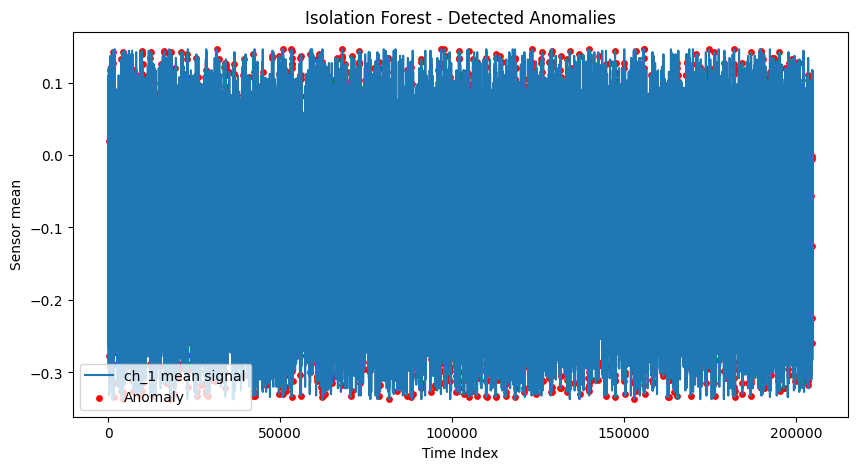

In [52]:
# =======================
# Approach 1 — Isolation Forest
# =======================
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features.drop(columns=['anomaly'], errors='ignore'))

# Train Isolation Forest
iso_model = IsolationForest(
    n_estimators=200,
    contamination=0.02,   # assume 2% anomalies
    max_samples='auto',
    random_state=42
)
iso_model.fit(X_scaled)

# Predict anomalies
df_features['iso_anomaly'] = iso_model.predict(X_scaled)
df_features['iso_anomaly'] = df_features['iso_anomaly'].map({1: 0, -1: 1})

print("\nIsolation Forest complete!")
print(df_features['iso_anomaly'].value_counts())

# Visualization
plt.figure(figsize=(10,5))
plt.plot(df_features.index, df_features['ch_1'], label='ch_1 mean signal')
plt.scatter(df_features.index[df_features['iso_anomaly']==1],
            df_features['ch_1'][df_features['iso_anomaly']==1],
            color='red', label='Anomaly', s=15)
plt.title("Isolation Forest - Detected Anomalies")
plt.xlabel("Time Index")
plt.ylabel("Sensor mean")
plt.legend()
plt.show()

Epoch [1/20], Loss: 0.555394
Epoch [2/20], Loss: 0.412553
Epoch [3/20], Loss: 0.360455
Epoch [4/20], Loss: 0.351995
Epoch [5/20], Loss: 0.344567
Epoch [6/20], Loss: 0.338448
Epoch [7/20], Loss: 0.331565
Epoch [8/20], Loss: 0.325273
Epoch [9/20], Loss: 0.320655
Epoch [10/20], Loss: 0.316840
Epoch [11/20], Loss: 0.312480
Epoch [12/20], Loss: 0.304627
Epoch [13/20], Loss: 0.295466
Epoch [14/20], Loss: 0.287972
Epoch [15/20], Loss: 0.282461
Epoch [16/20], Loss: 0.278230
Epoch [17/20], Loss: 0.274986
Epoch [18/20], Loss: 0.272773
Epoch [19/20], Loss: 0.271072
Epoch [20/20], Loss: 0.269814
ae_anomaly
0    200786
1      4014
Name: count, dtype: int64


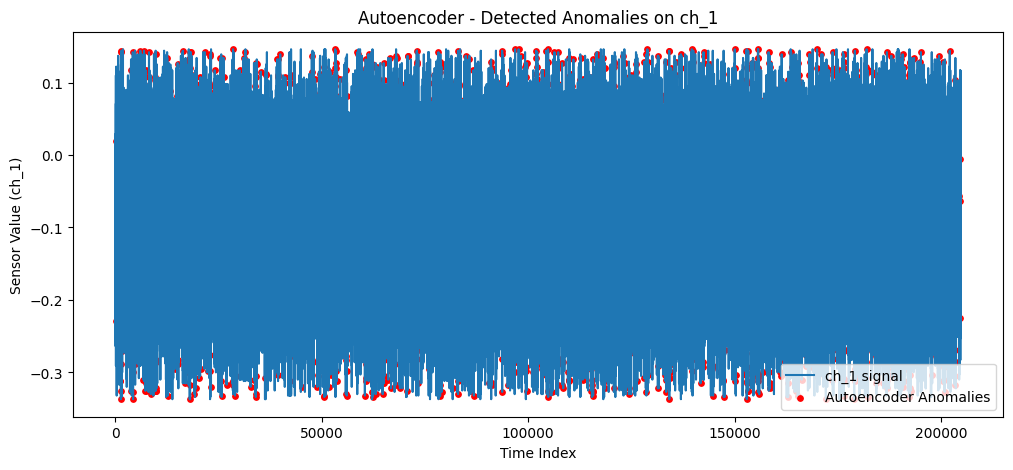

In [53]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =======================
# Prepare Data
# =======================
features = ['ch_1','ch_2','ch_3','ch_4','ch_5','ch_6','ch_7','ch_8']
X = df_features[features].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

# Dataset and loader
dataset = TensorDataset(X_tensor)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# =======================
# Define Autoencoder
# =======================
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 4)
        )
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Model
model = Autoencoder(input_dim=X_tensor.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# =======================
# Train Autoencoder
# =======================
n_epochs = 20
for epoch in range(n_epochs):
    running_loss = 0.0
    for batch in dataloader:
        inputs = batch[0]
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(dataloader):.6f}")

# =======================
# Detect Anomalies
# =======================
with torch.no_grad():
    X_recon = model(X_tensor)
    mse = nn.MSELoss(reduction='none')(X_recon, X_tensor).mean(dim=1)
    mse = mse.numpy()

# Threshold for anomalies (e.g., mean + 3*std)
threshold = np.mean(mse) + 3*np.std(mse)
anomalies = mse > threshold

# Add anomaly column to DataFrame
df_features['ae_anomaly'] = anomalies.astype(int)
print(df_features['ae_anomaly'].value_counts())

# =======================
# Visualize Anomalies
# =======================
plt.figure(figsize=(12,5))
plt.plot(df_features.index, df_features['ch_1'], label='ch_1 signal')
plt.scatter(df_features.index[df_features['ae_anomaly']==1],
            df_features.loc[df_features['ae_anomaly']==1, 'ch_1'],
            color='red', label='Autoencoder Anomalies', s=15)
plt.title("Autoencoder - Detected Anomalies on ch_1")
plt.xlabel("Time Index")
plt.ylabel("Sensor Value (ch_1)")
plt.legend()
plt.show()


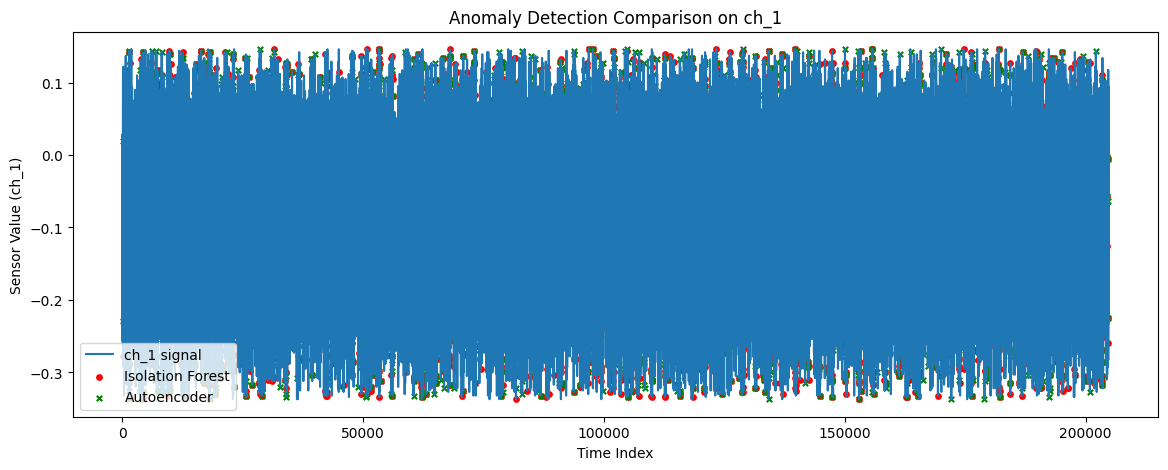

In [54]:
plt.figure(figsize=(14,5))
plt.plot(df_features.index, df_features['ch_1'], label='ch_1 signal')

# Isolation Forest anomalies
plt.scatter(df_features.index[df_features['iso_anomaly']==1],
            df_features.loc[df_features['iso_anomaly']==1, 'ch_1'],
            color='red', label='Isolation Forest', s=15)

# Autoencoder anomalies
plt.scatter(df_features.index[df_features['ae_anomaly']==1],
            df_features.loc[df_features['ae_anomaly']==1, 'ch_1'],
            color='green', label='Autoencoder', s=15, marker='x')

plt.title("Anomaly Detection Comparison on ch_1")
plt.xlabel("Time Index")
plt.ylabel("Sensor Value (ch_1)")
plt.legend()
plt.show()


In [57]:
# Add combined flags
df_features['both_anomaly'] = ((df_features['iso_anomaly']==1) & (df_features['ae_anomaly']==1)).astype(int)

# Summary counts
summary = pd.DataFrame({
    'Method': ['Isolation Forest', 'Autoencoder', 'Both Methods'],
    'Anomalies Detected': [
        df_features['iso_anomaly'].sum(),
        df_features['ae_anomaly'].sum(),
        df_features['both_anomaly'].sum()
    ]
})
print(summary)

             Method  Anomalies Detected
0  Isolation Forest                4096
1       Autoencoder                4014
2      Both Methods                1363


In [58]:
overlap_percent = (df_features['both_anomaly'].sum() / df_features['iso_anomaly'].sum()) * 100
print(f"Percentage of Isolation Forest anomalies also detected by Autoencoder: {overlap_percent:.2f}%")

Percentage of Isolation Forest anomalies also detected by Autoencoder: 33.28%


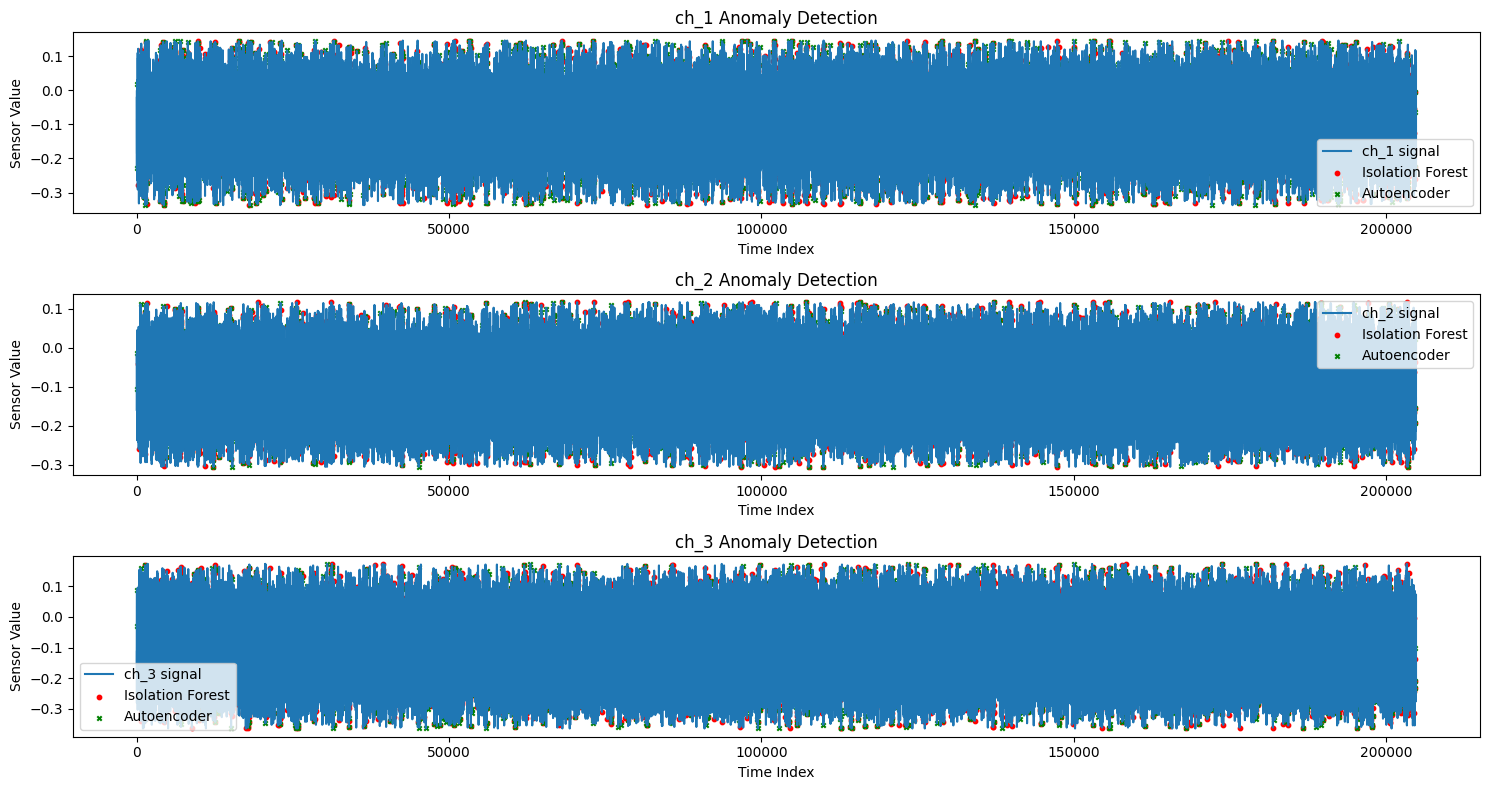

In [59]:
channels = ['ch_1', 'ch_2', 'ch_3']

plt.figure(figsize=(15,8))
for i, ch in enumerate(channels, 1):
    plt.subplot(len(channels), 1, i)
    plt.plot(df_features.index, df_features[ch], label=f'{ch} signal')
    
    # Isolation Forest anomalies
    plt.scatter(df_features.index[df_features['iso_anomaly']==1],
                df_features.loc[df_features['iso_anomaly']==1, ch],
                color='red', label='Isolation Forest', s=10)
    
    # Autoencoder anomalies
    plt.scatter(df_features.index[df_features['ae_anomaly']==1],
                df_features.loc[df_features['ae_anomaly']==1, ch],
                color='green', label='Autoencoder', s=10, marker='x')
    
    plt.title(f"{ch} Anomaly Detection")
    plt.xlabel("Time Index")
    plt.ylabel("Sensor Value")
    plt.legend()
    
plt.tight_layout()
plt.show()

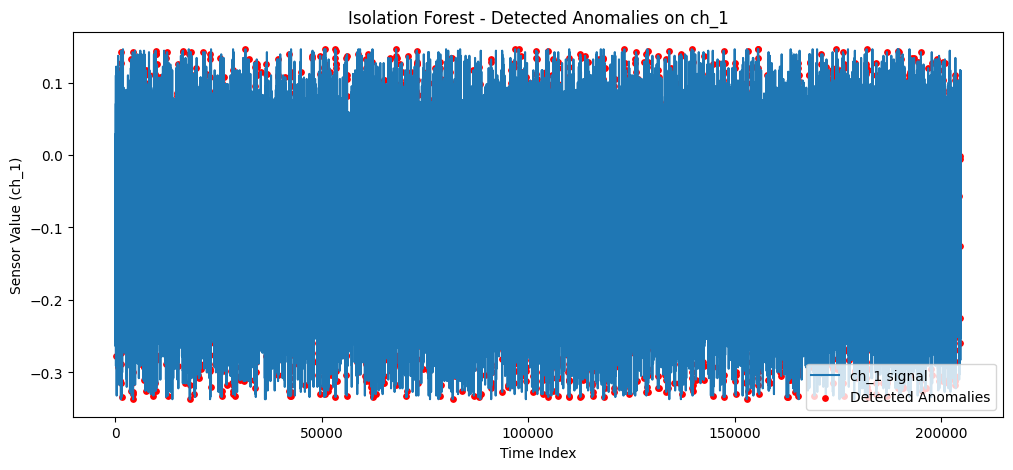

In [60]:
import matplotlib.pyplot as plt

# Plot ch_1 signal with detected anomalies
plt.figure(figsize=(12,5))
plt.plot(df_features.index, df_features['ch_1'], label='ch_1 signal')
plt.scatter(
    df_features.index[df_features['iso_anomaly']==1],
    df_features.loc[df_features['iso_anomaly']==1, 'ch_1'],
    color='red',
    label='Detected Anomalies',
    s=15
)
plt.title("Isolation Forest - Detected Anomalies on ch_1")
plt.xlabel("Time Index")
plt.ylabel("Sensor Value (ch_1)")
plt.legend()
plt.show()


In [61]:
# Create combined anomaly flag
df_features['both_anomaly'] = ((df_features['iso_anomaly']==1) & 
                               (df_features['ae_anomaly']==1)).astype(int)

# Summary counts
summary = pd.DataFrame({
    'Method': ['Isolation Forest', 'Autoencoder', 'Both Methods'],
    'Anomalies Detected': [
        df_features['iso_anomaly'].sum(),
        df_features['ae_anomaly'].sum(),
        df_features['both_anomaly'].sum()
    ]
})
print("✅ Anomaly Detection Summary:\n")
print(summary)

# Percentage overlap of Isolation Forest anomalies detected by Autoencoder
overlap_percent = (df_features['both_anomaly'].sum() / df_features['iso_anomaly'].sum()) * 100
print(f"\nPercentage of Isolation Forest anomalies also detected by Autoencoder: {overlap_percent:.2f}%")


✅ Anomaly Detection Summary:

             Method  Anomalies Detected
0  Isolation Forest                4096
1       Autoencoder                4014
2      Both Methods                1363

Percentage of Isolation Forest anomalies also detected by Autoencoder: 33.28%


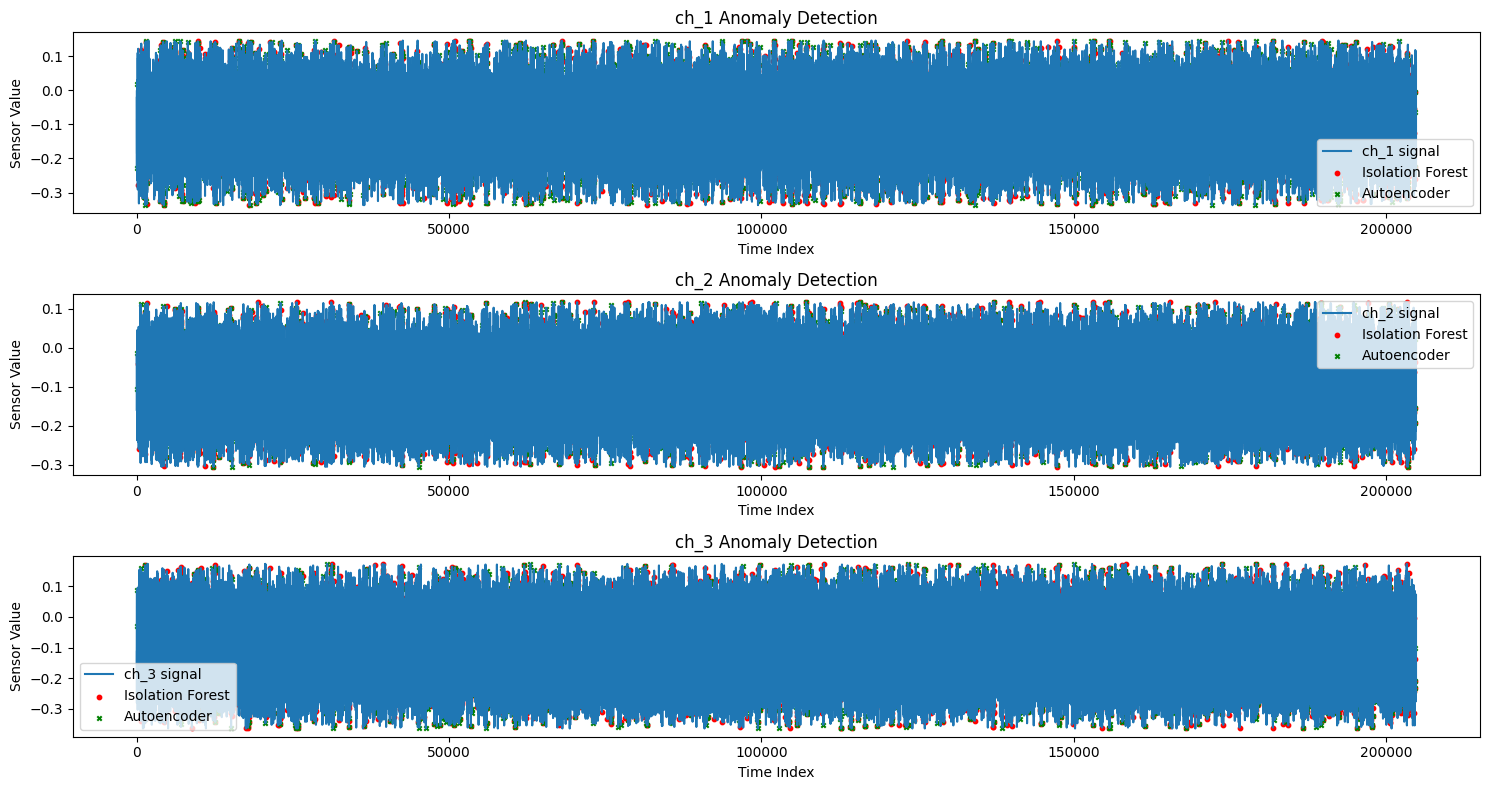

In [62]:
import matplotlib.pyplot as plt

channels = ['ch_1', 'ch_2', 'ch_3']  # You can extend to all 8 channels

plt.figure(figsize=(15, 8))
for i, ch in enumerate(channels, 1):
    plt.subplot(len(channels), 1, i)
    plt.plot(df_features.index, df_features[ch], label=f'{ch} signal')
    
    # Isolation Forest anomalies
    plt.scatter(df_features.index[df_features['iso_anomaly']==1],
                df_features.loc[df_features['iso_anomaly']==1, ch],
                color='red', label='Isolation Forest', s=10)
    
    # Autoencoder anomalies
    plt.scatter(df_features.index[df_features['ae_anomaly']==1],
                df_features.loc[df_features['ae_anomaly']==1, ch],
                color='green', label='Autoencoder', s=10, marker='x')
    
    plt.title(f"{ch} Anomaly Detection")
    plt.xlabel("Time Index")
    plt.ylabel("Sensor Value")
    plt.legend()

plt.tight_layout()
plt.show()
